# Exploring some data from the Dataset

In [1]:
from modules.lfw_lightning_data_module import LfwImagesDataset, LFW_DataModule
from tools.dataset_tools import get_dataset_filename_map

image_map = get_dataset_filename_map()
dataset = LfwImagesDataset(image_map)

In [2]:
#some of element in image map

c = 0
for key in image_map:
    print(key)
    print(image_map[key],"\n")
    c += 1
    if c==5:
        break

Paul_McNulty
['dataset/lfw_funneled/Paul_McNulty/Paul_McNulty_0002.jpg', 'dataset/lfw_funneled/Paul_McNulty/Paul_McNulty_0001.jpg'] 

Claudia_Pechstein
['dataset/lfw_funneled/Claudia_Pechstein/Claudia_Pechstein_0001.jpg', 'dataset/lfw_funneled/Claudia_Pechstein/Claudia_Pechstein_0003.jpg', 'dataset/lfw_funneled/Claudia_Pechstein/Claudia_Pechstein_0002.jpg', 'dataset/lfw_funneled/Claudia_Pechstein/Claudia_Pechstein_0005.jpg', 'dataset/lfw_funneled/Claudia_Pechstein/Claudia_Pechstein_0004.jpg'] 

Ranil_Wickremasinghe
['dataset/lfw_funneled/Ranil_Wickremasinghe/Ranil_Wickremasinghe_0002.jpg', 'dataset/lfw_funneled/Ranil_Wickremasinghe/Ranil_Wickremasinghe_0003.jpg', 'dataset/lfw_funneled/Ranil_Wickremasinghe/Ranil_Wickremasinghe_0001.jpg'] 

Mary-Kate_Olsen
['dataset/lfw_funneled/Mary-Kate_Olsen/Mary-Kate_Olsen_0002.jpg', 'dataset/lfw_funneled/Mary-Kate_Olsen/Mary-Kate_Olsen_0003.jpg', 'dataset/lfw_funneled/Mary-Kate_Olsen/Mary-Kate_Olsen_0001.jpg'] 

Phil_Mickelson
['dataset/lfw_funneled

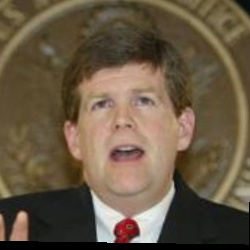

image1


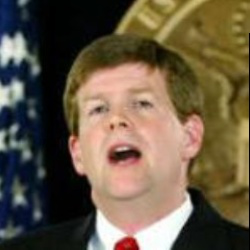

image2
They are the same person?  True

 
 



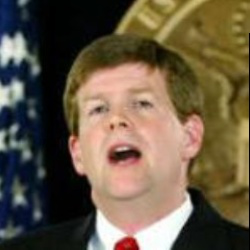

image1


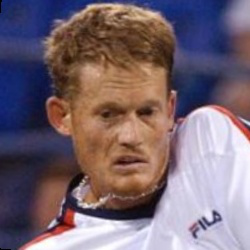

image2
They are the same person?  False

 
 



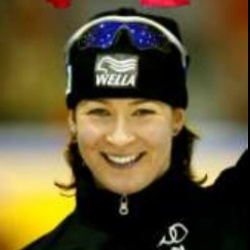

image1


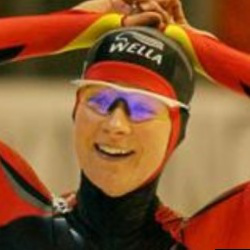

image2
They are the same person?  True

 
 



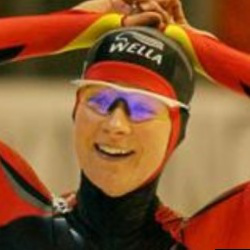

image1


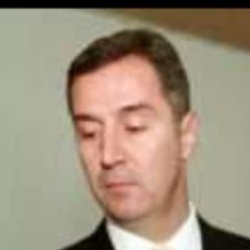

image2
They are the same person?  False

 
 



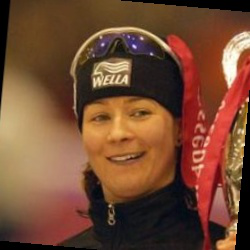

image1


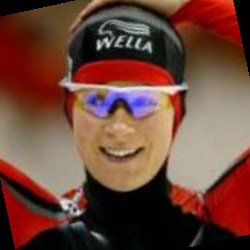

image2
They are the same person?  True

 
 



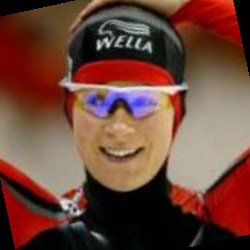

image1


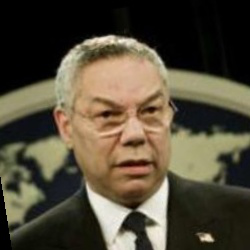

image2
They are the same person?  False

 
 



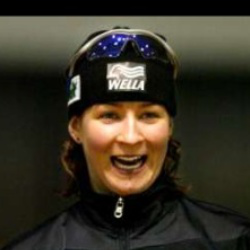

image1


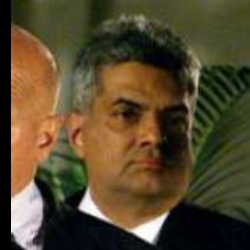

image2
They are the same person?  False

 
 



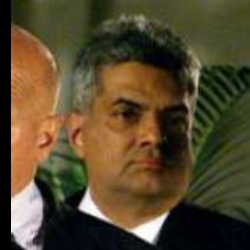

image1


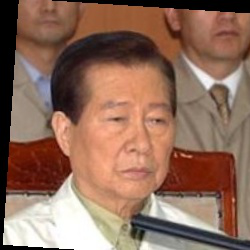

image2
They are the same person?  False

 
 



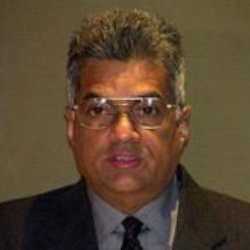

image1


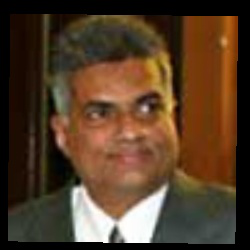

image2
They are the same person?  True

 
 



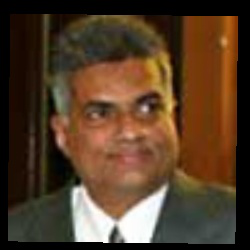

image1


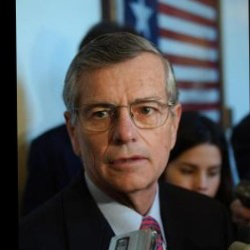

image2
They are the same person?  False


In [3]:
#some images

from PIL import Image
import numpy as np

c=0
for image1,image2,label in dataset:
    print("\n \n \n")
    display(image1)
    print("image1")
    display(image2)
    print("image2")
    print("They are the same person? ",label)
    c+=1
    if c==10:
        break


In [4]:
#some statistics
print("Number of subjects: ",len(image_map))
pic=0
for val in image_map.values():
    pic += len(val)
print("Total number of pictures: ",pic)
print("Avg pic for each subject: ", pic/len(image_map))

Number of subjects:  1680
Total number of pictures:  9164
Avg pic for each subject:  5.454761904761905


In [5]:
#DataLoader info
dataloader = LFW_DataModule(dataset)
dataloader.setup()
train_loader = dataloader.train_dataloader()
val_loader = dataloader.val_dataloader()
test_loader = dataloader.test_dataloader()

print("Batch_size: ", train_loader.batch_size)
print("Sampler info: ", train_loader.sampler)
print("Train loader length: ",len(train_loader))
print("Validation loader length: ",len(val_loader))
print("Test loader length: ",len(test_loader))

Batch_size:  32
Sampler info:  <torch.utils.data.sampler.RandomSampler object at 0x7f9d6784d2e0>
Train loader length:  2
Validation loader length:  1
Test loader length:  285


In [6]:
#Dataloader samples
c = 0
for im1, im2, label in train_loader:
    c+=1
    print(im1)
    print(im2)
    print(label)
    print("\n \n \n")

tensor([[[[ 0.3777,  0.3904,  0.4031,  ..., -0.4115, -0.4115, -0.4115],
          [ 0.3777,  0.3904,  0.4031,  ..., -0.4242, -0.4242, -0.4242],
          [ 0.3904,  0.4031,  0.4031,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.1569, -0.1569, -0.1824,  ..., -0.4242, -0.4242, -0.4242],
          [-0.1569, -0.1696, -0.1824,  ..., -0.4242, -0.4242, -0.4242],
          [-0.1696, -0.1696, -0.1824,  ..., -0.4242, -0.4242, -0.4242]],

         [[ 0.5686,  0.5813,  0.5940,  ..., -0.4242, -0.4242, -0.4242],
          [ 0.5686,  0.5813,  0.5940,  ..., -0.4242, -0.4242, -0.4242],
          [ 0.5813,  0.5940,  0.5940,  ..., -0.4115, -0.4115, -0.4115],
          ...,
          [-0.1315, -0.1315, -0.1569,  ..., -0.4242, -0.4242, -0.4242],
          [-0.1315, -0.1442, -0.1569,  ..., -0.4242, -0.4242, -0.4242],
          [-0.1442, -0.1442, -0.1569,  ..., -0.4242, -0.4242, -0.4242]],

         [[ 0.9632,  0.9759,  0.9886,  ..., -0.4242, -0.4242, -0.4242],
          [ 0.9632,  0.9759,  